In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline


In [41]:
df= pd.read_csv('data/hmQOVnDvRN.xls')

In [42]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [44]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [45]:
Demographics = ['gender', 'SeniorCitizen','Partner', 'Dependents']
AccountInfo = ['tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Sevices = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
Financials = ['MonthlyCharges', 'TotalCharges']

In [46]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "No"
    
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

### Bivariate Analysis

#### 1.Plots


#### 1.1 Churn vs Demographic features

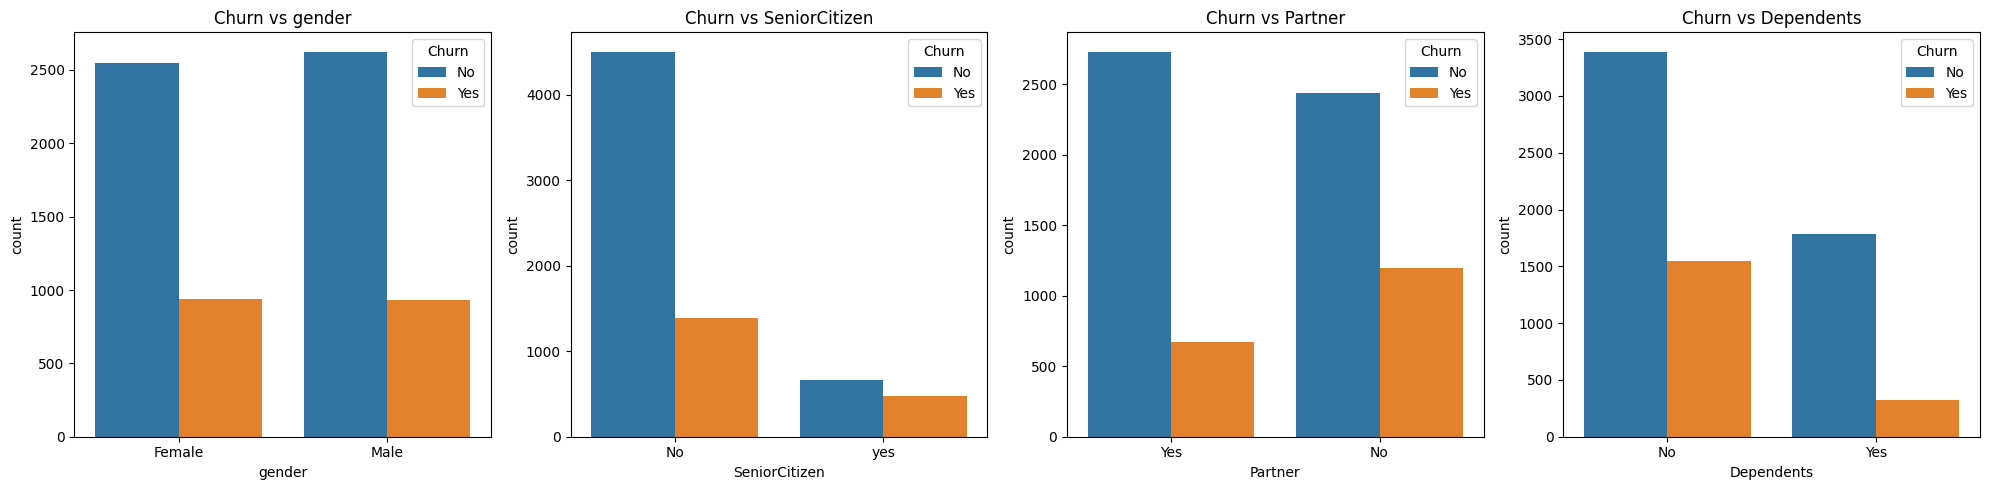

In [47]:
fig, axes = plt.subplots(1, len(Demographics), figsize=(20, 5))
for i, col in enumerate(Demographics):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn vs {col}')
plt.tight_layout()
plt.show()

#### 1.2 Churn vs AccountInfo features

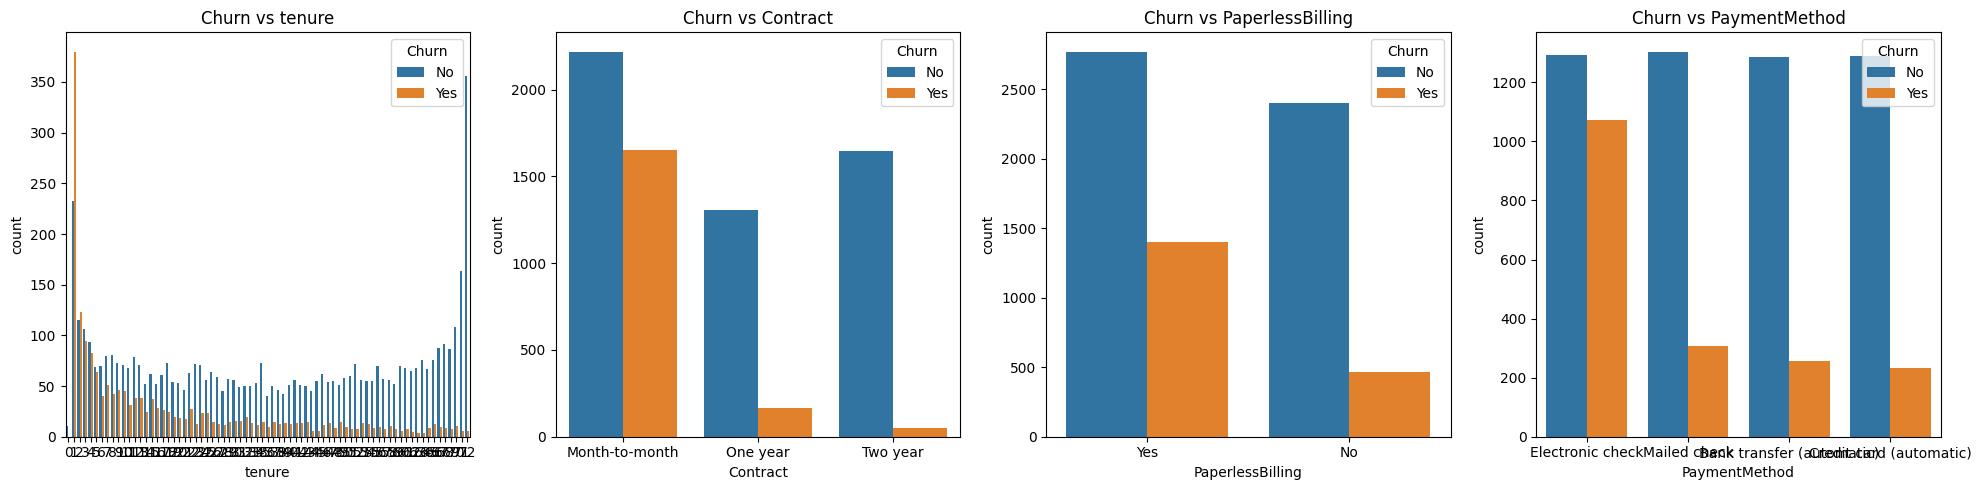

In [ ]:
fig, axes = plt.subplots(1, len(AccountInfo), figsize=(20, 5))
for i, col in enumerate(AccountInfo):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn vs {col}')
plt.tight_layout()
plt.show()

#### 1.3 Churn vs Service features

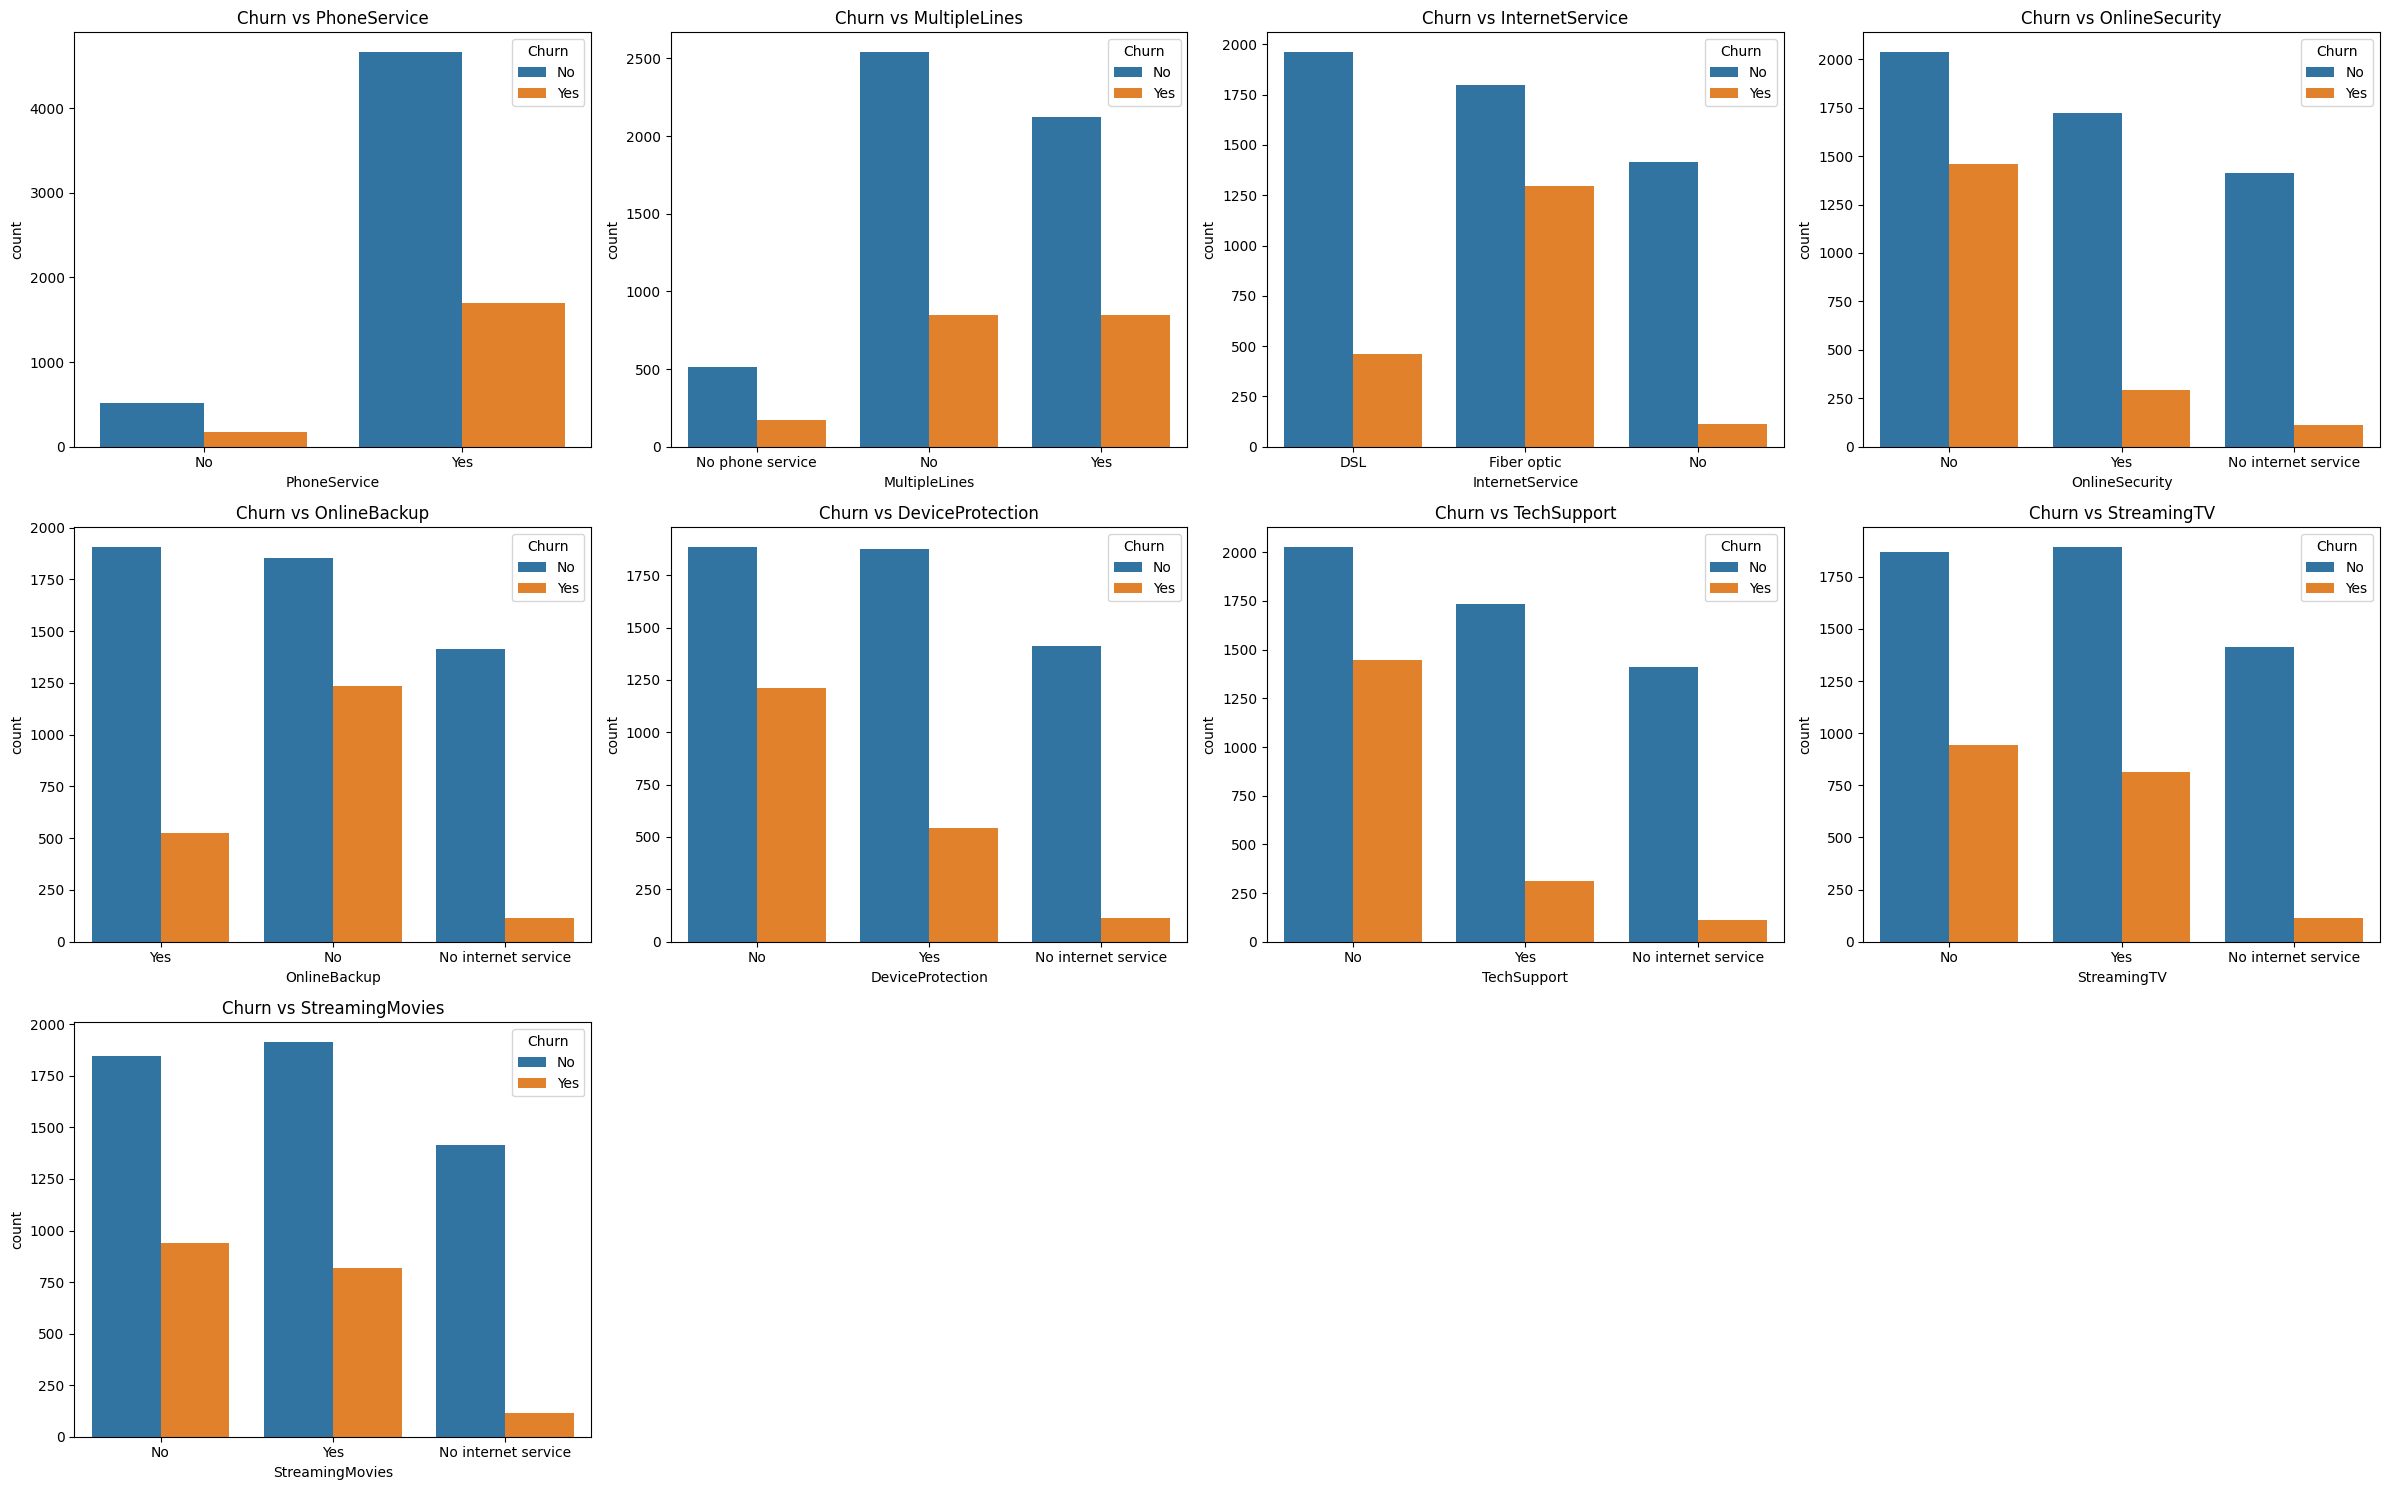

In [53]:
import math

cols_per_row = 4
num_charts = len(Sevices)
num_rows = math.ceil(num_charts / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(6 * cols_per_row, 5 * num_rows))

for i, col in enumerate(Sevices):
    row = i // cols_per_row
    col_idx = i % cols_per_row
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Churn vs {col}')

# Hide unused axes if any
for j in range(num_charts, num_rows * cols_per_row):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [63]:
import numpy as np
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['Churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [65]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_numeric
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


### 2. correlation matrix for numerical features

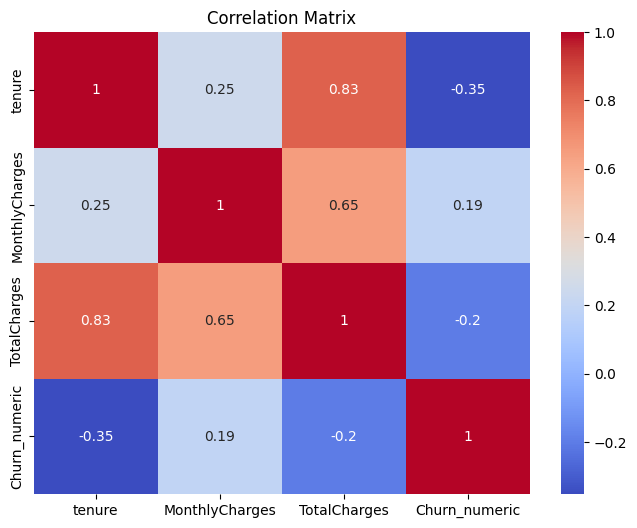

In [69]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr = df[numerical_features + ['Churn_numeric']].corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 3. chi-sqare test for categorical features

In [68]:
from scipy.stats import chi2_contingency

categorical_features = Demographics + AccountInfo + Sevices
categorical_features.remove('tenure')
chi2_results = {}

for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = {'chi2': chi2, 'p-value': p}

chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index')
chi2_df = chi2_df.reset_index().rename(columns={'index': 'Feature', 'chi2': 'Chi2 Statistic', 'p-value': 'P-Value'})

# Display the table
print(chi2_df)

             Feature  Chi2 Statistic        P-Value
0             gender        0.484083   4.865787e-01
1      SeniorCitizen      159.426300   1.510067e-36
2            Partner      158.733382   2.139911e-36
3         Dependents      189.129249   4.924922e-43
4           Contract     1184.596572  5.863038e-258
5   PaperlessBilling      258.277649   4.073355e-58
6      PaymentMethod      648.142327  3.682355e-140
7       PhoneService        0.915033   3.387825e-01
8      MultipleLines       11.330441   3.464383e-03
9    InternetService      732.309590  9.571788e-160
10    OnlineSecurity      849.998968  2.661150e-185
11      OnlineBackup      601.812790  2.079759e-131
12  DeviceProtection      558.419369  5.505219e-122
13       TechSupport      828.197068  1.443084e-180
14       StreamingTV      374.203943   5.528994e-82
15   StreamingMovies      375.661479   2.667757e-82


### Feature Engineering

<Axes: xlabel='ServiceCount'>

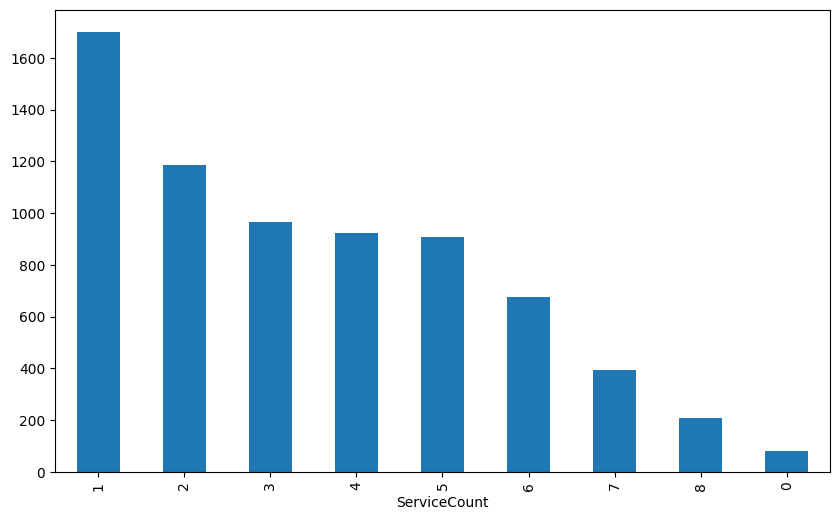

In [80]:
df['ServiceCount'] = df[['PhoneService', 'MultipleLines', 'OnlineSecurity',
                         'OnlineBackup', 'DeviceProtection', 'TechSupport',
                         'StreamingTV', 'StreamingMovies']].apply(lambda x: sum(x == 'Yes'), axis=1)
df['ServiceCount'].value_counts().plot(kind='bar', figsize=(10, 6))


<Axes: xlabel='ServiceCount', ylabel='Churn_numeric'>

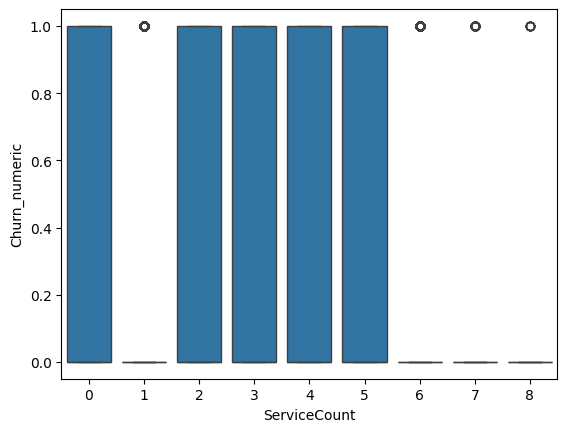

In [81]:
import seaborn as sns
sns.boxplot(x='ServiceCount', y='Churn_numeric', data=df)

Taking only important features

In [72]:
important_features = ['Contract', 'OnlineSecurity', 'TechSupport','PaymentMethod', 'InternetService', 'TotalCharges', 'tenure']
df_important = df[important_features + ['Churn']]
df_important

,Contract,OnlineSecurity,TechSupport,PaymentMethod,InternetService,TotalCharges,tenure,Churn
0,Month-to-month,No,No,Electronic check,DSL,29.85,1,No
1,One year,Yes,No,Mailed check,DSL,1889.50,34,No
2,Month-to-month,Yes,No,Mailed check,DSL,108.15,2,Yes
3,One year,Yes,Yes,Bank transfer (automatic),DSL,1840.75,45,No
4,Month-to-month,No,No,Electronic check,Fiber optic,151.65,2,Yes
...,...,...,...,...,...,...,...,...
7038,One year,Yes,Yes,Mailed check,DSL,1990.50,24,No
7039,One year,No,No,Credit card (automatic),Fiber optic,7362.90,72,No
7040,Month-to-month,Yes,No,Electronic check,DSL,346.45,11,No
7041,Month-to-month,No,No,Mailed check,Fiber optic,306.60,4,Yes


In [73]:
df_important['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [75]:
df_important['InternetService'].unique()
df_important['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

### Build Pipeline